In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../Dataset/Embedding/'
outputFilename = 'delhiconventionalOutput.csv'

## With Word Embedding (BoW) Dataset

In [3]:
X = pd.read_csv(path+'delhi_WE_100.csv')
Y = pd.read_csv(path+'delhi_classLabel.csv')
print(X.shape,Y.shape)

(15438, 100) (15438, 1)


In [4]:
Y

,label
0,Others
1,Traffic information/advisory
2,Others
3,Others
4,Others
...,...
15433,Others
15434,Road closure
15435,Traffic congestion/heavy traffic
15436,Others


In [5]:
Y.label.value_counts()

Traffic obstruction/car breakdown    4831
Others                               3459
Traffic congestion/heavy traffic     2821
Road closure                         1487
Water logging                        1156
Traffic information/advisory         1001
City program                          416
Accident                              267
Name: label, dtype: int64

In [6]:
labels = Y.label.unique()
labels.sort()
labels

array(['Accident', 'City program', 'Others', 'Road closure',
       'Traffic congestion/heavy traffic', 'Traffic information/advisory',
       'Traffic obstruction/car breakdown', 'Water logging'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 100) (3860, 100)


In [8]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [9]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.09622566, 0.12168514, 0.1354336 , ..., 0.093968  , 0.1435163 ,
        0.14197246],
       [0.11607507, 0.0967386 , 0.13224056, ..., 0.11429469, 0.12419326,
        0.1537855 ],
       [0.13597483, 0.11535217, 0.12707806, ..., 0.10245694, 0.14356033,
        0.11315414],
       ...,
       [0.10983368, 0.1281186 , 0.13495218, ..., 0.14511537, 0.11950153,
        0.10043214],
       [0.09805013, 0.07601845, 0.1517019 , ..., 0.13981437, 0.15904085,
        0.14029553],
       [0.12921469, 0.10757416, 0.14579664, ..., 0.1409918 , 0.12896723,
        0.12565956]])

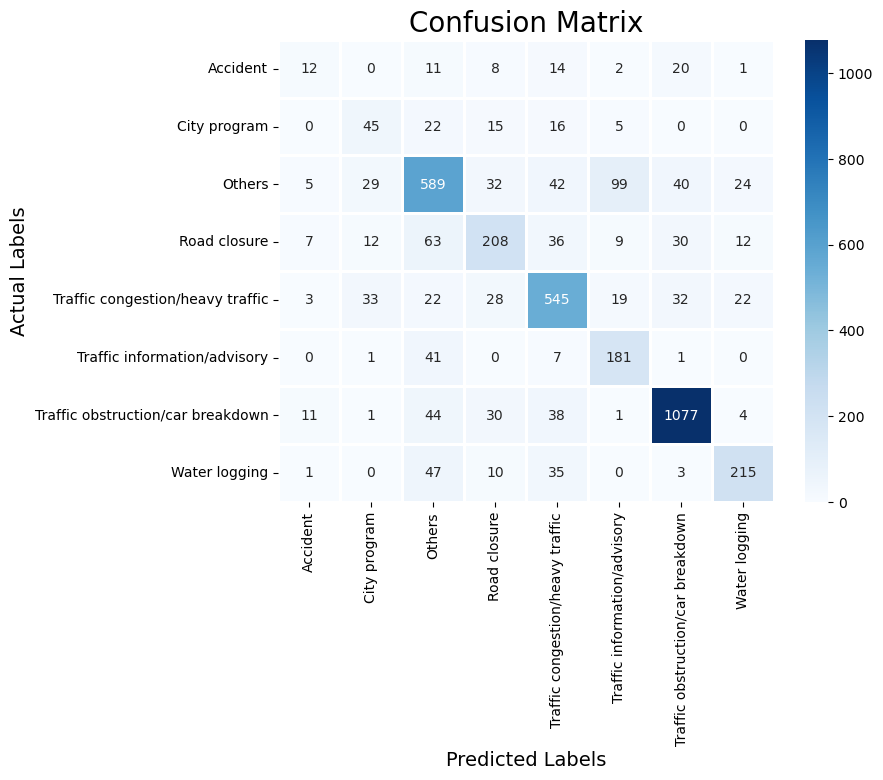

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [11]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       0.31      0.18      0.22        68
                     City program       0.37      0.44      0.40       103
                           Others       0.70      0.68      0.69       860
                     Road closure       0.63      0.55      0.59       377
 Traffic congestion/heavy traffic       0.74      0.77      0.76       704
     Traffic information/advisory       0.57      0.78      0.66       231
Traffic obstruction/car breakdown       0.90      0.89      0.89      1206
                    Water logging       0.77      0.69      0.73       311

                         accuracy                           0.74      3860
                        macro avg       0.62      0.62      0.62      3860
                     weighted avg       0.75      0.74      0.74      3860

F1-score:  74.4041450777202 %


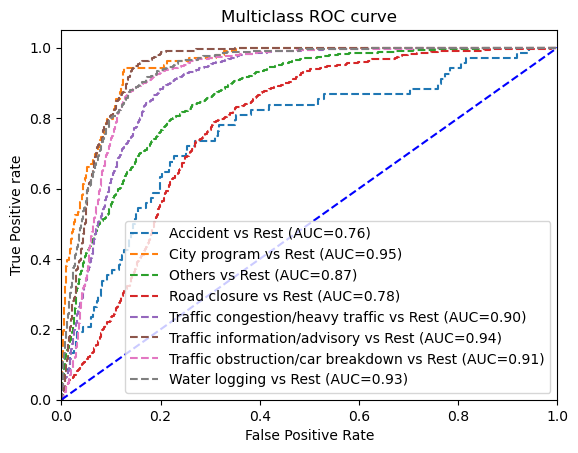

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.744,0.624,0.624,0.619,0.880


In [14]:
import sys

with open(outputFilename, 'a') as f:
    print('Adaboost-w2v,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)

## With Infersent Embedding

In [15]:
X = pd.read_csv(path+'delhi_infercent_4096_2.csv')
X = X.iloc[:,1:]
# Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(15438, 4096) (15438, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 4096) (3860, 4096)


In [17]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [18]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.02213195, 0.13531051, 0.14173206, ..., 0.13809954, 0.14472147,
        0.13829229],
       [0.0221594 , 0.13832959, 0.14135934, ..., 0.13791071, 0.1393395 ,
        0.13786969],
       [0.02353685, 0.13767335, 0.14163566, ..., 0.13801318, 0.13969072,
        0.13596375],
       ...,
       [0.02331127, 0.13938847, 0.14240993, ..., 0.13848379, 0.13912654,
        0.13471579],
       [0.06488607, 0.03004469, 0.1554085 , ..., 0.14265589, 0.15771061,
        0.14802725],
       [0.02324931, 0.13515345, 0.14189368, ..., 0.13738317, 0.14577057,
        0.13739866]])

In [19]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       0.61      0.87      0.72        67
                     City program       0.61      0.62      0.62       109
                           Others       0.53      0.33      0.41       846
                     Road closure       0.31      0.25      0.27       387
 Traffic congestion/heavy traffic       0.42      0.70      0.53       660
     Traffic information/advisory       0.61      0.61      0.61       266
Traffic obstruction/car breakdown       0.86      0.85      0.85      1224
                    Water logging       0.92      0.79      0.85       301

                         accuracy                           0.62      3860
                        macro avg       0.61      0.63      0.61      3860
                     weighted avg       0.63      0.62      0.62      3860

F1-score:  62.15025906735752 %


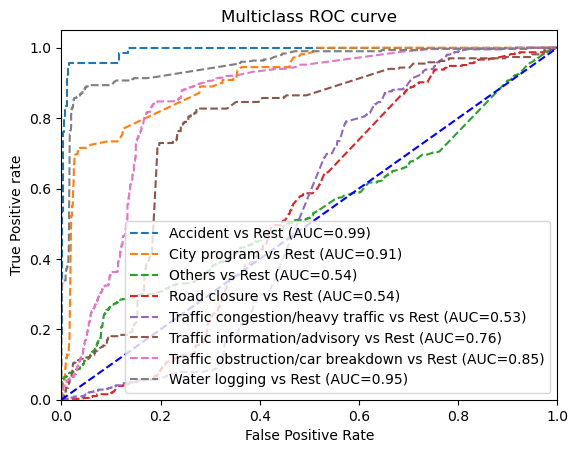

In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.622,0.609,0.626,0.607,0.759


In [22]:
import sys

with open(outputFilename, 'a') as f:
    print('Adaboost-infercent,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)